## Feature Selection-Information gain - mutual information In Classification Problem Statements

#### Mutual Information 

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [1]:
import pandas as pd

In [2]:
# Read in the csv file stored at the specified URL and store it in a dataframe called 'df'
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

# Display the first 5 rows of the dataframe
df.head()


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Get the unique values of the 'Wine' column
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [5]:
# Get information about the 'df' dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
# Import train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Wine'], axis=1),  # predictors
    df['Wine'],  # target
    test_size=0.3,  # percentage of data to use for test set
    random_state=0)  # seed for random number generator


In [7]:
# Display the first 5 rows of the training predictors dataframe
X_train.head()


,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [8]:
# Import the mutual_info_classif function from scikit-learn's feature_selection module
from sklearn.feature_selection import mutual_info_classif

# Calculate the mutual information between the predictors and the target
mutual_info = mutual_info_classif(X_train, y_train)

# Print the mutual information
print(mutual_info)


[0.40740036 0.29786566 0.19150339 0.24042269 0.20441023 0.47856234
 0.72444608 0.09714223 0.27095626 0.61711588 0.54027315 0.54283685
 0.5362917 ]


This code uses the mutual_info_classif() function from scikit-learn's feature_selection module to calculate the mutual information between the predictors in X_train and the target in y_train.

The mutual information is a measure of the statistical dependence between two variables. It can be used to assess the strength of the relationship between the predictors and the target in a classification problem. A high mutual information value indicates a strong relationship between the two variables, while a low mutual information value indicates a weak relationship.

The mutual_info_classif() function returns an array of mutual information values, one for each predictor in X_train. 

In [9]:
# Convert the mutual information array to a Pandas series
mutual_info = pd.Series(mutual_info)

# Assign the column names of 'X_train' as the index of the mutual_info series
mutual_info.index = X_train.columns

# Sort the mutual_info series in descending order
mutual_info.sort_values(ascending=False)


Flavanoids              0.724446
Color.int               0.617116
OD                      0.542837
Hue                     0.540273
Proline                 0.536292
Phenols                 0.478562
Alcohol                 0.407400
Malic.acid              0.297866
Proanth                 0.270956
Acl                     0.240423
Mg                      0.204410
Ash                     0.191503
Nonflavanoid.phenols    0.097142
dtype: float64

<AxesSubplot: >

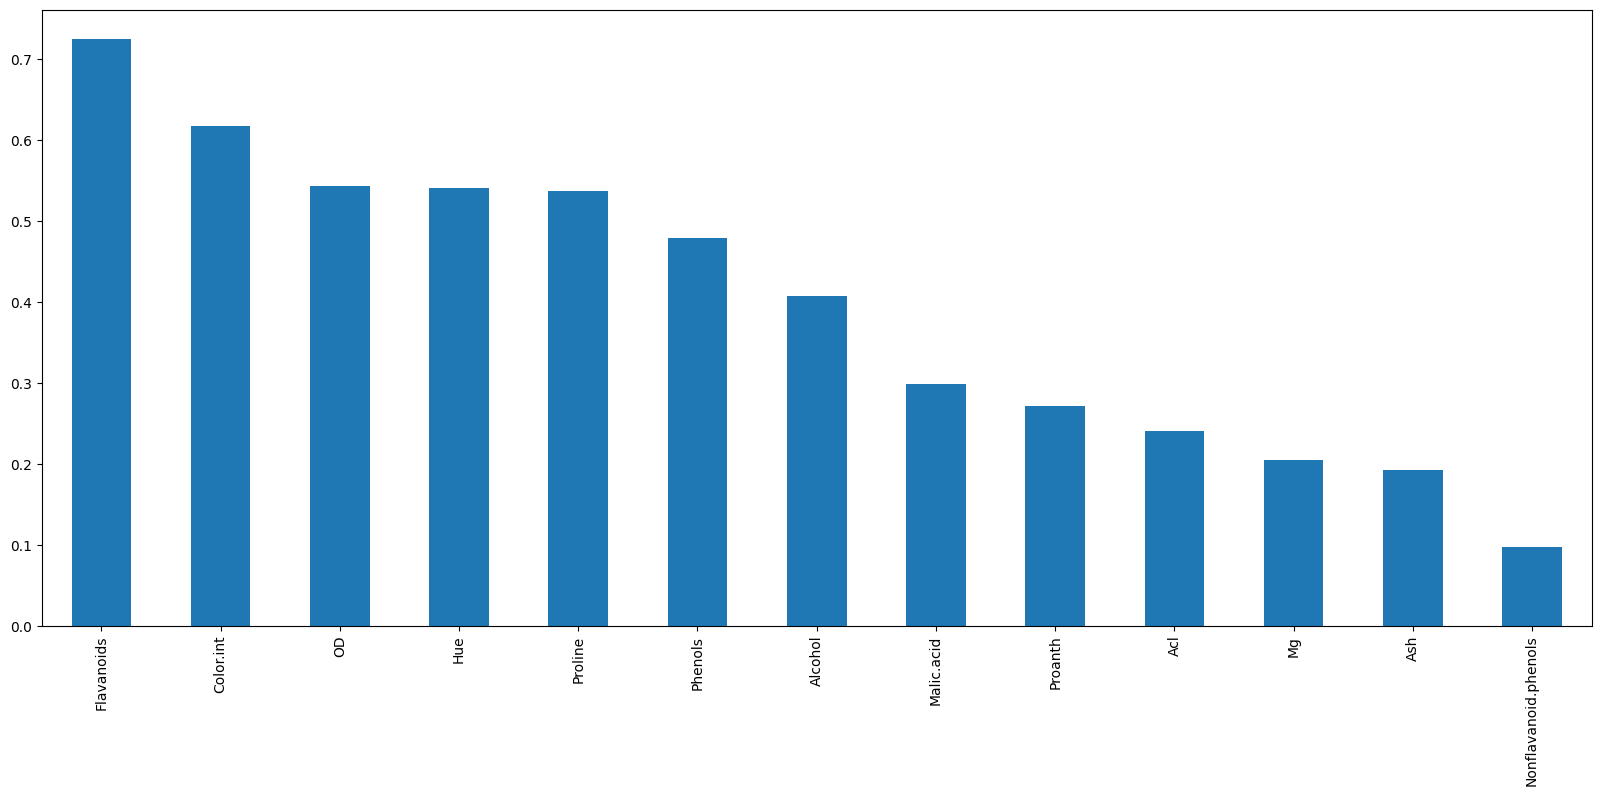

In [10]:
# Sort the mutual_info series in descending order and plot a bar chart
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [11]:
# Import the SelectKBest function from scikit-learn's feature_selection module
from sklearn.feature_selection import SelectKBest


The SelectKBest function is a feature selection method that selects a certain number of the best features based on a statistical test. It can be used to select the top k features from a dataset, where k is an integer that you specify.

For example, if you have a dataset with 10 features and you want to select the top 5 features based on their mutual information with the target, you can use the SelectKBest function and set k=5. The function will then return a new dataset with only the top 5 features.

The SelectKBest function is commonly used in machine learning pipelines to select the most relevant features for a model, which can help improve the model's performance and reduce overfitting.

In [13]:
# Create a SelectKBest object that selects the top 5 features based on mutual information
sel_five_cols = SelectKBest(mutual_info_classif, k=5)

# Fit the object to the training data and target
sel_five_cols.fit(X_train, y_train)

# Get the names of the selected columns
X_train.columns[sel_five_cols.get_support()]


Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

#### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y)
and
IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for 
information gain. Technically, they calculate the same quantity
if applied to the same data.

## Example

Suppose we have a dataset with two features, 'Gender' and 'Age', and a target variable called 'Income'. The 'Gender' feature can take on the values 'Male' or 'Female', and the 'Age' feature can take on integer values ranging from 18 to 80. The 'Income' target can take on integer values ranging from 0 to 100,000.

We can calculate the entropy of the 'Income' target by counting the number of observations for each value and then applying the following formula:

$$H(Income) = -\sum_{i=1}^n p_i \log_2 p_i$$

where $p_i$ is the probability of the $i^{th}$ value occurring in the target.

For example, if the 'Income' target has 100 observations with values ranging from 0 to 100,000, and the value 0 occurs 50 times, the probability of 0 occurring is 0.5, and the entropy of the 'Income' target is:

$$H(Income) = -0.5 \log_2 0.5 - 0.5 \log_2 0.5 = 1$$

We can then calculate the entropy of the 'Income' target given the 'Gender' feature

First, we need to calculate the entropy of the 'Income' target given the 'Gender' feature. To do this, we can group the observations by 'Gender' and calculate the entropy of the 'Income' target for each group. For example, if there are 50 observations for 'Male' and 50 observations for 'Female', we can calculate the entropy of the 'Income' target for each group as follows:

$$H(Income|Gender=Male) = -\sum_{i=1}^n p_i \log_2 p_i$$

$$H(Income|Gender=Female) = -\sum_{i=1}^n p_i \log_2 p_i$$

where $p_i$ is the probability of the $i^{th}$ value occurring in the 'Income' target for the given 'Gender' group.

Next, we can calculate the weighted average entropy of the 'Income' target given the 'Gender' feature using the following formula:

$$H(Income|Gender) = \frac{n_{Male}}{n}H(Income|Gender=Male) + \frac{n_{Female}}{n}H(Income|Gender=Female)$$

where $n_{Male}$ is the number of observations for 'Male', $n_{Female}$ is the number of observations for 'Female', and $n$ is the total number of observations.

Finally, we can calculate the information gain of the 'Gender' feature using the following formula:

$$IG(Gender) = H(Income) - H(Income|Gender)$$

The information gain of the 'Gender' feature is the difference between the entropy of the 'Income' target and the weighted average entropy of the 'Income' target given the 'Gender' feature.

We can repeat this process to calculate the information gain of the